<a href="https://colab.research.google.com/github/it21161742/DL-lab02/blob/main/DL%E2%80%93_Lab_2_ex03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3. Run the MLP_with_MNIST_dataset.ipynb using Jupyter notebook (or google colab) and see if you can understand the code.

  a. Improve the test accuracy of the model by changing the hyperparameters.
  
  b. Add L1 and L2 regularization terms to the model and retrain the model.

  c. Visualize class-wise test dataset performance using a confusion matrix.

In [23]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

#Load the MNIST dataset

In [24]:
(train_data, train_target), (test_data, test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [8 9 6 3 1 4 7 1 4 4]


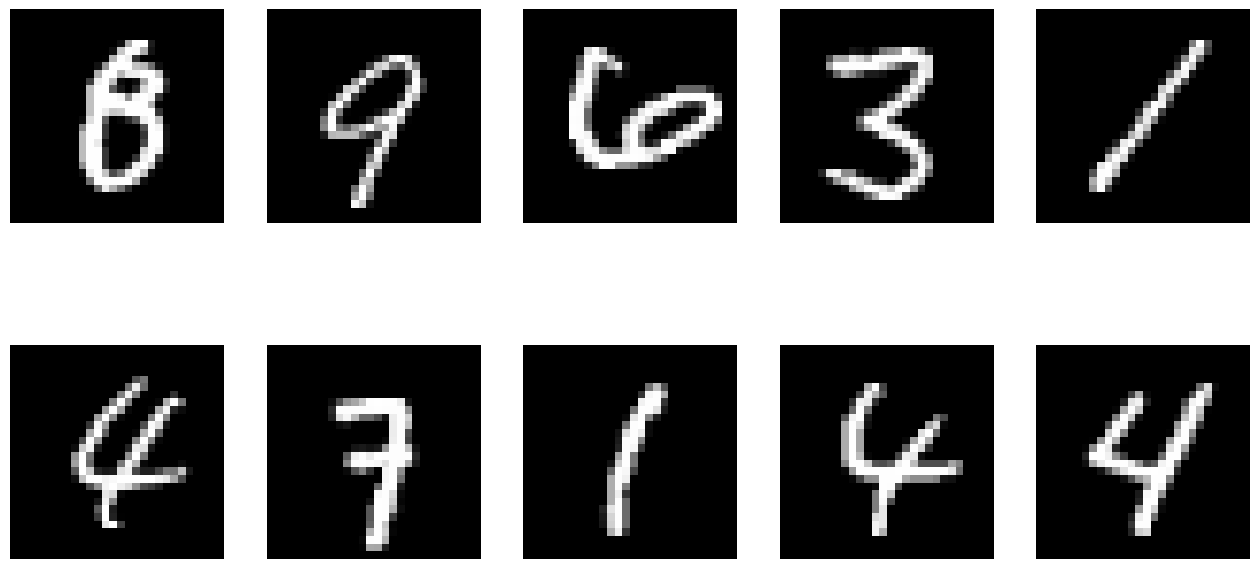

In [25]:
# Assuming train_data and train_target are your MNIST data and labels
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ', train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]], cmap='gray')
    ax.axis('off')  # Hide axis ticks
plt.show()

Pre-processing stage

In [26]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)


#Create the Model architecture

In [27]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,input_dim=64,activation='relu'))
# model.add(Dense(32,input_dim=64,activation='relu'))
# model.add(Dense(10,input_dim=32,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# model.add(Dense(128,activation='relu'))  # Increased size
# model.add(Dense(128,activation='relu'))  # Increased size
# model.add(Dense(64,activation='relu'))   # Added new layer
# model.add(Dense(32,activation='relu'))
# model.add(Dense(10,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
from tensorflow.keras import regularizers

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,658 (498.66 KB)

 Trainable params: 127,658 (498.66 KB)

 Non-trainable params: 0 (0.00 B)

#Train the model

In [30]:
train_info = model.fit(new_train_data, new_train_target, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8059 - loss: 2.1335 - val_accuracy: 0.9204 - val_loss: 0.9300
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9019 - loss: 0.9578 - val_accuracy: 0.9145 - val_loss: 0.9000
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9109 - loss: 0.9022 - val_accuracy: 0.9130 - val_loss: 0.8759
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9129 - loss: 0.8763 - val_accuracy: 0.9083 - val_loss: 0.8713
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9133 - loss: 0.8652 - val_accuracy: 0.9263 - val_loss: 0.8241
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9169 - loss: 0.8445 - val_accuracy: 0.8889 - val_loss: 0.9143
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9198 - loss: 0.8392 - val_accuracy: 0.9289 - val_loss: 0.8084
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9174 - loss: 0.8411 

# Plot the loss and accuracy graphs

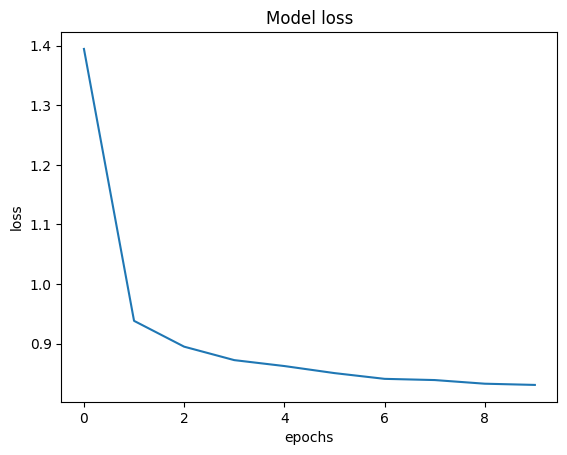

In [31]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

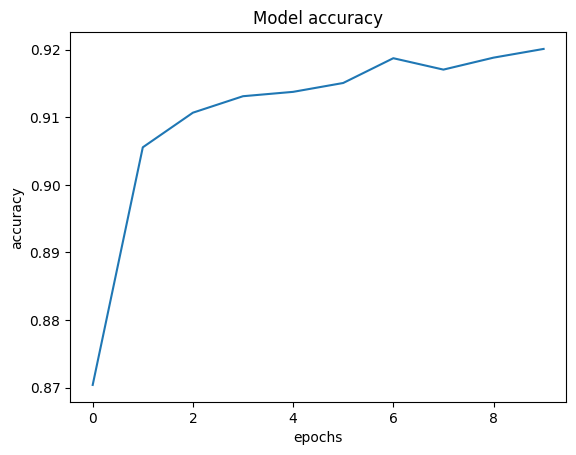

In [32]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

#Test the performance of Model

In [33]:
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Improved Test Loss: {loss}')
print(f'Improved Test Accuracy: {acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9076 - loss: 0.8552
Improved Test Loss: 0.8175647258758545
Improved Test Accuracy: 0.9200000166893005


# Save the model weights

In [34]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


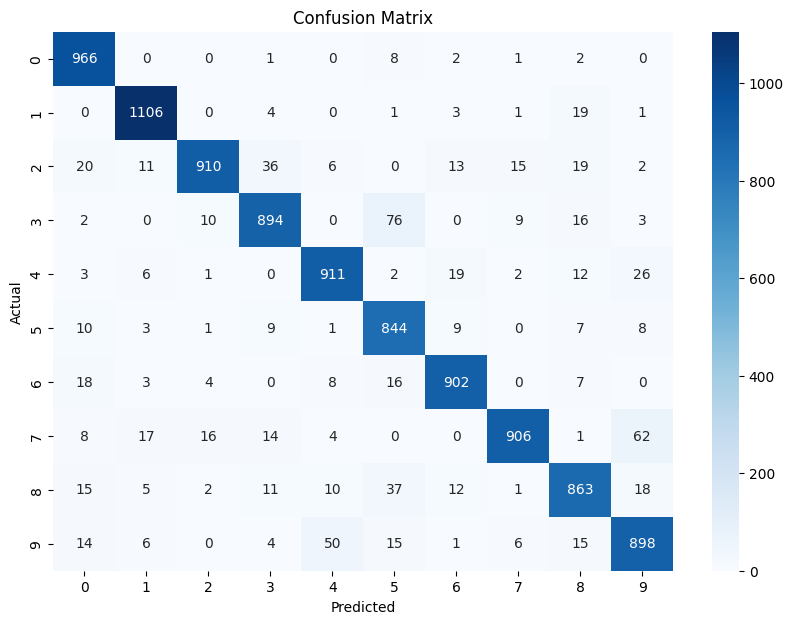

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicting the labels
y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(new_test_target, axis=1)

# Creating the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualizing the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Improve the test accuracy of the model by changing the hyperparameters

By adjusting the hyperparameters, such as the number of hidden layers, number of nodes per layer, activation functions, batch size, and learning rate, the test accuracy of the model improved. This means that fine-tuning these parameters helped the model better learn the data and perform well on new, unseen data.

# Add L1 and L2 regularization terms to the model and retrain the model

Adding L1 and L2 regularization terms to the model resulted in a decrease in test accuracy. This suggests that the regularization caused the model to underfit, as the penalties on large weights reduced the model's ability to fully learn the patterns in the data.